### Load images and resize to standard dimension

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from PIL import Image
import timeit


from tensorflow.python.framework import ops
import cv2
import math


import matplotlib.pyplot as plt
%matplotlib inline


#########################################################################################
#  Convert Labels to one hot vector
#########################################################################################


def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot


#########################################################################################
#  create mini batches 
#########################################################################################


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches



#########################################################################################
#  load metadata of images 
#########################################################################################

def load_image_metadata(filePath):
    df = pd.read_csv(filePath)
    images_metadata=  dict([(i,[a, b]) for i, a, b in zip(df.filename, df.Type, df.class_aggr)])
    return images_metadata


#########################################################################################
#  load jpeg images from a folder into a list and standardize dimensions of the images 
#########################################################################################

def load_images(folder, dim, images_metadata):
    images = []
    filenames = []
    classes = []
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        
        img_resized =  cv2.resize(img, dim)
        if img is not None:
            images.append(img_resized)
            filenames.append(filename)
            classes.append(images_metadata[filename][1])
    return (filenames, images, np.array(classes))


### Flatten and standarize entire data set 

In [5]:
#########################################################################################
#  Flatten Reshape images to array of column vectors for each image 
#########################################################################################

def flatten_dataset(my_images):
    my_array = np.array(my_images, dtype=np.int32)
    X_flatten = my_array.reshape(my_array.shape[0], -1).T 
    
    # X_flatten = X_flatten / 255
    return X_flatten


Number of dev examples: m_dev = 6
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
dev_set_x shape: (12288, 6)
000599.jpg


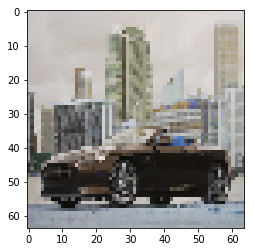

In [3]:
# define image height and width for standardiation

num_px = 64
dim = (num_px, num_px)

# Load metadata of images
img_metadata =  load_image_metadata("./data/meta-data/car_meta_data.csv")

# load images from the dev folder 

(dev_filenames, dev_images, dev_classes) = load_images("e:/car/car_ims/dev/", dim, img_metadata)

# get number of images
m_dev  = len(dev_images)

# reshape images to array of vectors 
dev_set_x = flatten_dataset(dev_images)

# Print dev images details
print ("Number of dev examples: m_dev = " + str(m_dev))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("dev_set_x shape: " + str(dev_set_x.shape))


# img1 = np.uint8(dev_set_x[:, index].reshape(64, 64, 3))

# Diplay a sample image from Dev set
index = 1

print(dev_filenames[index])

plt.imshow(dev_images[index])




### Load Training and Test Data

In [ ]:
num_px = 224
dim = (num_px, num_px)

(train_filenames, train_images, train_classes) = load_images("e:/Car/car_ims/train/", dim, img_metadata)
(test_filenames, test_images, test_classes) = load_images("e:/Car/car_ims/test/", dim, img_metadata)


m_train  = len(train_images)
m_test  = len(test_images)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

index = 77

plt.imshow(train_images[index])



In [7]:
# Define number of classes
C = 15

# Flatten the training and test images
X_train = flatten_dataset(train_images)
X_test = flatten_dataset(test_images)

# Convert training and test labels to one hot matrices
Y_train = one_hot_matrix(train_classes, C)
Y_test = one_hot_matrix(test_classes, C)


print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 14562
number of test examples = 1623
X_train shape: (12288, 14562)
Y_train shape: (15, 14562)
X_test shape: (12288, 1623)
Y_test shape: (15, 1623)


# 2.1 - Create placeholders¶

In [8]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    ### END CODE HERE ###
    
    return X, Y

# 2.2 - Initializing the parameters

In [33]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [50, 12288], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [50, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [C, 50], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [C, 1], initializer = tf.zeros_initializer())
#     W3 = tf.get_variable("W3", [C, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
#     b3 = tf.get_variable("b3", [C, 1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
#                   "W3": W3,
#                   "b3": b3}
    
    return parameters

# 2.3 - Forward propagation in tensorflow

In [29]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
#     W3 = parameters['W3']
#     b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
#     A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
#     Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z2

# 2.4 Compute cost

In [30]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

# 2.5 - Backward propagation & parameter updates
This is where you become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.
After you compute the cost function. You will create an "optimizer" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.
For instance, for gradient descent the optimizer would be:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
To make the optimization you would do:
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.
Note When coding, we often use _ as a "throwaway" variable to store values that we won't need to use later. Here, _ takes on the evaluated value of optimizer, which we don't need (and c takes the value of the cost variable).

# 2.6 - Building the model

In [31]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 512, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    regularizer = 0.1 * sum(reg_losses)
    cost = cost + regularizer
   
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                
                minibatch_start_time = timeit.default_timer()
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 2 == 0:
                correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                print ("Cost after epoch %i: %f; Training Accuracy: %f, Test Accuracy: %f" % (epoch, epoch_cost, accuracy.eval({X: X_train, Y: Y_train}), accuracy.eval({X: X_test, Y: Y_test})))

            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 2.264914; Training Accuracy: 0.267889, Test Accuracy: 0.268022
Cost after epoch 2: 2.150352; Training Accuracy: 0.280387, Test Accuracy: 0.268022
Cost after epoch 4: 2.119837; Training Accuracy: 0.290139, Test Accuracy: 0.276032
Cost after epoch 6: 2.093790; Training Accuracy: 0.293778, Test Accuracy: 0.269254
Cost after epoch 8: 2.078676; Training Accuracy: 0.292886, Test Accuracy: 0.264325
Cost after epoch 10: 2.065122; Training Accuracy: 0.294190, Test Accuracy: 0.268022
Cost after epoch 12: 2.053031; Training Accuracy: 0.308268, Test Accuracy: 0.279113
Cost after epoch 14: 2.043188; Training Accuracy: 0.308955, Test Accuracy: 0.277264
Cost after epoch 16: 2.031629; Training Accuracy: 0.312732, Test Accuracy: 0.279113
Cost after epoch 18: 2.019093; Training Accuracy: 0.315959, Test Accuracy: 0.279729
Cost after epoch 20: 2.011857; Training Accuracy: 0.320286, Test Accuracy: 0.278497
Cost after epoch 22: 2.004661; Training Accuracy: 0.318432, Test Accuracy: 0.2821

Cost after epoch 196: 1.512250; Training Accuracy: 0.511743, Test Accuracy: 0.256932
Cost after epoch 198: 1.513590; Training Accuracy: 0.500069, Test Accuracy: 0.267406
Cost after epoch 200: 1.507744; Training Accuracy: 0.507073, Test Accuracy: 0.263709
Cost after epoch 202: 1.512266; Training Accuracy: 0.484824, Test Accuracy: 0.243376
Cost after epoch 204: 1.501101; Training Accuracy: 0.527331, Test Accuracy: 0.261245
Cost after epoch 206: 1.493158; Training Accuracy: 0.512498, Test Accuracy: 0.263093
Cost after epoch 208: 1.488661; Training Accuracy: 0.511743, Test Accuracy: 0.263709
Cost after epoch 210: 1.482657; Training Accuracy: 0.516893, Test Accuracy: 0.263093
Cost after epoch 212: 1.484770; Training Accuracy: 0.476171, Test Accuracy: 0.270487
Cost after epoch 214: 1.486331; Training Accuracy: 0.497116, Test Accuracy: 0.279113
Cost after epoch 216: 1.491564; Training Accuracy: 0.525065, Test Accuracy: 0.264325
Cost after epoch 218: 1.476701; Training Accuracy: 0.523554, Test

Cost after epoch 390: 1.265834; Training Accuracy: 0.596553, Test Accuracy: 0.263093
Cost after epoch 392: 1.257291; Training Accuracy: 0.586733, Test Accuracy: 0.255083
Cost after epoch 394: 1.256859; Training Accuracy: 0.609120, Test Accuracy: 0.229205
Cost after epoch 396: 1.257315; Training Accuracy: 0.589411, Test Accuracy: 0.270487
Cost after epoch 398: 1.250744; Training Accuracy: 0.594492, Test Accuracy: 0.271103
Cost after epoch 400: 1.254393; Training Accuracy: 0.600330, Test Accuracy: 0.250154
Cost after epoch 402: 1.246473; Training Accuracy: 0.592226, Test Accuracy: 0.244609
Cost after epoch 404: 1.247414; Training Accuracy: 0.600604, Test Accuracy: 0.264325
Cost after epoch 406: 1.264393; Training Accuracy: 0.589548, Test Accuracy: 0.259396
Cost after epoch 408: 1.245656; Training Accuracy: 0.583848, Test Accuracy: 0.263709
Cost after epoch 410: 1.243092; Training Accuracy: 0.575676, Test Accuracy: 0.268022
Cost after epoch 412: 1.251762; Training Accuracy: 0.611317, Test

Cost after epoch 584: 1.094810; Training Accuracy: 0.642219, Test Accuracy: 0.259396
Cost after epoch 586: 1.100743; Training Accuracy: 0.613377, Test Accuracy: 0.269254
Cost after epoch 588: 1.109693; Training Accuracy: 0.618322, Test Accuracy: 0.274184
Cost after epoch 590: 1.088249; Training Accuracy: 0.638511, Test Accuracy: 0.267406
Cost after epoch 592: 1.097797; Training Accuracy: 0.626906, Test Accuracy: 0.235367
Cost after epoch 594: 1.104337; Training Accuracy: 0.625532, Test Accuracy: 0.249538
Cost after epoch 596: 1.122612; Training Accuracy: 0.616948, Test Accuracy: 0.253851
Cost after epoch 598: 1.099732; Training Accuracy: 0.652589, Test Accuracy: 0.240296
Cost after epoch 600: 1.111728; Training Accuracy: 0.638717, Test Accuracy: 0.266790
Cost after epoch 602: 1.122234; Training Accuracy: 0.637344, Test Accuracy: 0.261861
Cost after epoch 604: 1.095457; Training Accuracy: 0.648194, Test Accuracy: 0.252619
Cost after epoch 606: 1.090150; Training Accuracy: 0.645859, Test

Cost after epoch 778: 1.013561; Training Accuracy: 0.678478, Test Accuracy: 0.244609
Cost after epoch 780: 1.005066; Training Accuracy: 0.704780, Test Accuracy: 0.239063
Cost after epoch 782: 0.995062; Training Accuracy: 0.674839, Test Accuracy: 0.253851
Cost after epoch 784: 1.014161; Training Accuracy: 0.693861, Test Accuracy: 0.229205
Cost after epoch 786: 1.013955; Training Accuracy: 0.685757, Test Accuracy: 0.210105
Cost after epoch 788: 1.018293; Training Accuracy: 0.662684, Test Accuracy: 0.249538
Cost after epoch 790: 1.001706; Training Accuracy: 0.687337, Test Accuracy: 0.248922
Cost after epoch 792: 1.040381; Training Accuracy: 0.670650, Test Accuracy: 0.251386
Cost after epoch 794: 0.979794; Training Accuracy: 0.672572, Test Accuracy: 0.237215
Cost after epoch 796: 1.009247; Training Accuracy: 0.658426, Test Accuracy: 0.244609
Cost after epoch 798: 0.986834; Training Accuracy: 0.657671, Test Accuracy: 0.248922
Cost after epoch 800: 1.030306; Training Accuracy: 0.652040, Test

Cost after epoch 972: 0.965272; Training Accuracy: 0.642219, Test Accuracy: 0.268022
Cost after epoch 974: 0.951237; Training Accuracy: 0.710754, Test Accuracy: 0.227357
Cost after epoch 976: 0.966644; Training Accuracy: 0.684590, Test Accuracy: 0.243376
Cost after epoch 978: 0.967581; Training Accuracy: 0.654374, Test Accuracy: 0.225508
Cost after epoch 980: 0.966890; Training Accuracy: 0.663027, Test Accuracy: 0.247073
Cost after epoch 982: 0.946978; Training Accuracy: 0.710548, Test Accuracy: 0.232902
Cost after epoch 984: 0.909796; Training Accuracy: 0.687268, Test Accuracy: 0.216882
Cost after epoch 986: 0.926988; Training Accuracy: 0.679096, Test Accuracy: 0.222428
Cost after epoch 988: 0.934824; Training Accuracy: 0.693655, Test Accuracy: 0.250154
Cost after epoch 990: 0.919638; Training Accuracy: 0.647988, Test Accuracy: 0.237215
Cost after epoch 992: 0.925438; Training Accuracy: 0.728265, Test Accuracy: 0.234134
Cost after epoch 994: 0.942480; Training Accuracy: 0.706840, Test

Cost after epoch 1164: 0.896076; Training Accuracy: 0.710205, Test Accuracy: 0.205792
Cost after epoch 1166: 0.921819; Training Accuracy: 0.615163, Test Accuracy: 0.249538
Cost after epoch 1168: 0.906158; Training Accuracy: 0.642975, Test Accuracy: 0.225508
Cost after epoch 1170: 0.917582; Training Accuracy: 0.711509, Test Accuracy: 0.217498
Cost after epoch 1172: 0.914523; Training Accuracy: 0.731218, Test Accuracy: 0.230437
Cost after epoch 1174: 0.983974; Training Accuracy: 0.694479, Test Accuracy: 0.227973
Cost after epoch 1176: 0.925732; Training Accuracy: 0.727716, Test Accuracy: 0.244609
Cost after epoch 1178: 0.853881; Training Accuracy: 0.749828, Test Accuracy: 0.211953
Cost after epoch 1180: 0.887106; Training Accuracy: 0.744403, Test Accuracy: 0.240296
Cost after epoch 1182: 0.876320; Training Accuracy: 0.741038, Test Accuracy: 0.231054
Cost after epoch 1184: 0.911783; Training Accuracy: 0.670581, Test Accuracy: 0.241528
Cost after epoch 1186: 0.914446; Training Accuracy: 0.

Cost after epoch 1356: 1.145222; Training Accuracy: 0.693037, Test Accuracy: 0.196550
Cost after epoch 1358: 0.889499; Training Accuracy: 0.694479, Test Accuracy: 0.227357
Cost after epoch 1360: 1.074399; Training Accuracy: 0.692350, Test Accuracy: 0.241528
Cost after epoch 1362: 0.856211; Training Accuracy: 0.721810, Test Accuracy: 0.199630
Cost after epoch 1364: 0.823178; Training Accuracy: 0.734995, Test Accuracy: 0.227973
Cost after epoch 1366: 1.166491; Training Accuracy: 0.724420, Test Accuracy: 0.209489
Cost after epoch 1368: 0.835873; Training Accuracy: 0.700110, Test Accuracy: 0.222428
Cost after epoch 1370: 0.872042; Training Accuracy: 0.701483, Test Accuracy: 0.257548
Cost after epoch 1372: 0.850848; Training Accuracy: 0.728197, Test Accuracy: 0.241528
Cost after epoch 1374: 0.835343; Training Accuracy: 0.683560, Test Accuracy: 0.240912
Cost after epoch 1376: 0.891861; Training Accuracy: 0.702239, Test Accuracy: 0.240912
Cost after epoch 1378: 0.996262; Training Accuracy: 0.

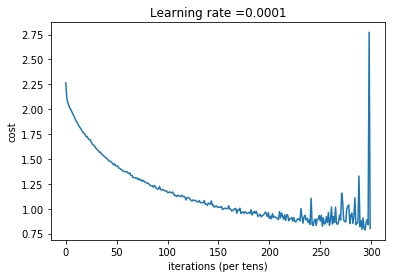

Parameters have been trained!
Train Accuracy: 0.728128
Test Accuracy: 0.208872


In [34]:
parameters = model(X_train, Y_train, X_test, Y_test)